# Python - Exploratory Data Analysis on Spotify 2023 Dataset

### JOSE MARTIN SJ. NINOBLA                                                                   
### 2 ECE - D

#### --Importing libraries and Data reading/encoding:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('spotify-2023.csv',encoding='latin1')

### 1. Overview of Dataset

#### - How many rows and columns does the dataset contain??

#### - What are the data types of each column? Are there any missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [10]:
#This checks missing values in the dataset
missing_values1 = df.isnull().sum()
print(missing_values1)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


### Cleaning the Dataset for Duplicates and Null Values and Wrong formats

In [12]:
# Creates a DataFrame containing duplicate rows based on 'artist(s)_name' and 'track_name'
dup = df[df.duplicated(['artist(s)_name','track_name'])]
# Prints a message indicating that we are showing the duplicate tracks
print("Duplicate tracks in this dataset are: ")
# Prints the rows that are duplicates based on 'artist(s)_name' and 'track_name'
# The 'duplicated' method returns a Boolean Series where duplicates are marked as True
# So we filter the DataFrame to show only the duplicate rows
print(dup)

Duplicate tracks in this dataset are: 
           track_name artist(s)_name  artist_count  released_year  \
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
482              10            31                   573                  0   
616               8             6                  6392                  0   
764               4            14                  9021                  0   
873               3            19                  1818                  0   

       streams  in_apple_playlists  ...  bpm  key   mode danceability_%  \
482  301869854                   1  ...  166   C#  Major             70   
616  432702334                 174  ...  121   G#  Major             75   

In [13]:
# This will place the highest stream count at the top for each duplicate group
df.sort_values(by=['artist(s)_name','track_name', 'streams', 'in_spotify_playlists'], ascending=[True, True, False, False], inplace=True)

# Drop duplicates, keeping only the first occurrence (which now has the highest streams)
df = df.drop_duplicates(subset=['artist(s)_name','track_name'], keep='first')

In [14]:
# Combine all conditions with the logical OR operator (|)
tracks_of_interest = ['SPIT IN MY FACE!', 'Take My Breath', 'About Damn Time', 'SNAP']

# Filter the DataFrame to show all rows where the 'track_name' is in the list
filtered_df = df[df['track_name'].isin(tracks_of_interest)]

# Display the results
print(filtered_df['track_name'])

764     About Damn Time
178                SNAP
616      Take My Breath
345    SPIT IN MY FACE!
Name: track_name, dtype: object


In [15]:
missing_values2 = df.isnull().sum()
print(missing_values2)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     94
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [16]:
df = df.dropna()
missing_values3 = df.isnull().sum()
print(missing_values3)

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


In [17]:
# Remove commas from the 'in_deezer_playlists' column and convert to integer
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '', regex=False).astype('int64')
# Converts 'streams' into int64 type
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
# Converts 'in_shazam_charts' into int64 type
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 921 to 752
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            814 non-null    object 
 1   artist(s)_name        814 non-null    object 
 2   artist_count          814 non-null    int64  
 3   released_year         814 non-null    int64  
 4   released_month        814 non-null    int64  
 5   released_day          814 non-null    int64  
 6   in_spotify_playlists  814 non-null    int64  
 7   in_spotify_charts     814 non-null    int64  
 8   streams               813 non-null    float64
 9   in_apple_playlists    814 non-null    int64  
 10  in_apple_charts       814 non-null    int64  
 11  in_deezer_playlists   814 non-null    int64  
 12  in_deezer_charts      814 non-null    int64  
 13  in_shazam_charts      810 non-null    float64
 14  bpm                   814 non-null    int64  
 15  key                   814 

In [18]:
df = df.sort_values(by='streams', ascending = False).reset_index(drop=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
1,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
2,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
3,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
4,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Overdrive,Post Malone,1,2023,7,14,410,36,1.478042e+07,36,...,140,C#,Major,56,48,73,0,0,35,4
810,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,1.195664e+07,5,...,133,B,Minor,93,68,65,42,0,12,25
811,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1.365184e+06,13,...,105,G,Major,82,62,74,10,0,33,7
812,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,162,A#,Major,49,78,64,19,0,11,4


### 2. Basic Descriptive Statistics

#### - What are the mean, median, and standard deviation of the streams column?
#### - What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [21]:
print('dtype: ',df['streams'].dtype) #Shows the data type
# Calculates mean, median, and standard deviation of streams
mean = df['streams'].mean()
median = df['streams'].median()
std = df['streams'].std()
# Prints the mean median and std
print('mean:', mean)
print('median:', median)
print('std:', std)

dtype:  float64
mean: 469293928.200492
median: 263779030.0
std: 523848431.0692303


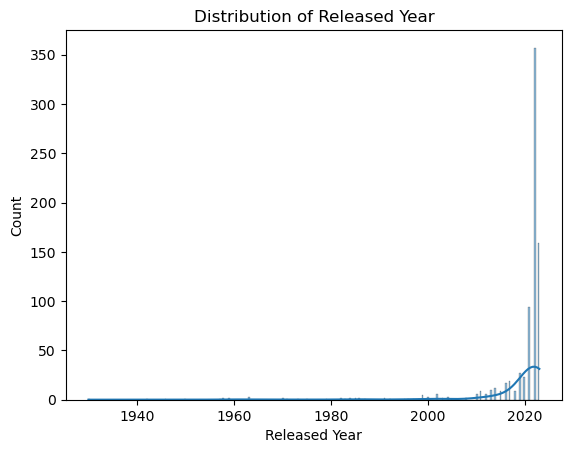

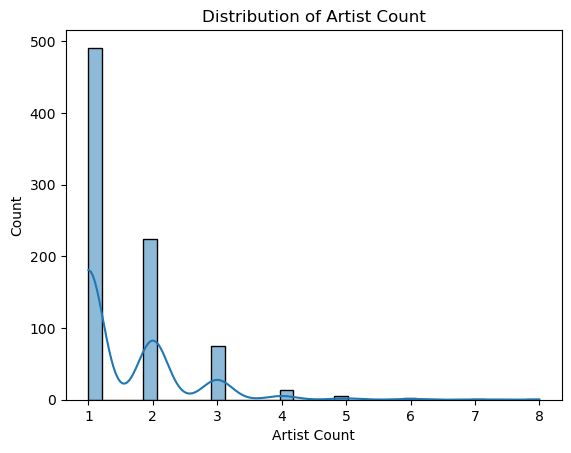

In [22]:
# Chart for the 'released_year'
sns.histplot(df['released_year'], kde=True)
plt.title("Distribution of Released Year")
plt.xlabel("Released Year")
plt.show()

# Chart for the 'artist_count'
sns.histplot(df['artist_count'], kde=True)
plt.title("Distribution of Artist Count")
plt.xlabel("Artist Count")
plt.show()

### 3.  Top Performers
#### - Which track has the highest number of streams? Display the top 5 most streamed tracks
#### -  Who are the top 5 most frequent artists based on the number of tracks in the dataset??

In [24]:
# Sort the dataset by 'streams' in descending order and select the top 5 tracks
top_streamed_tracks = df.sort_values(by='streams', ascending=False).head(5)

# Display the top 5 most streamed tracks with relevant information
print("Top 5 Most Streamed Tracks:")
print(top_streamed_tracks[['track_name', 'artist(s)_name', 'streams']])


Top 5 Most Streamed Tracks:
                                      track_name  \
0                                   Shape of You   
1  Sunflower - Spider-Man: Into the Spider-Verse   
2                                      One Dance   
3                      STAY (with Justin Bieber)   
4                                       Believer   

                 artist(s)_name       streams  
0                    Ed Sheeran  3.562544e+09  
1         Post Malone, Swae Lee  2.808097e+09  
2           Drake, WizKid, Kyla  2.713922e+09  
3  Justin Bieber, The Kid Laroi  2.665344e+09  
4               Imagine Dragons  2.594040e+09  


In [25]:
# Count the occurrences of each artist and select the top 5
top_artists = df['artist(s)_name'].value_counts().head(5)

# Display the top 5 most frequent artists
print("Top 5 Most Frequent Artists by Number of Tracks:")
print(top_artists)


Top 5 Most Frequent Artists by Number of Tracks:
artist(s)_name
Taylor Swift    29
SZA             17
Bad Bunny       16
The Weeknd      14
Harry Styles    12
Name: count, dtype: int64


### 4.  Temporal Trends
#### - Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
#### - Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

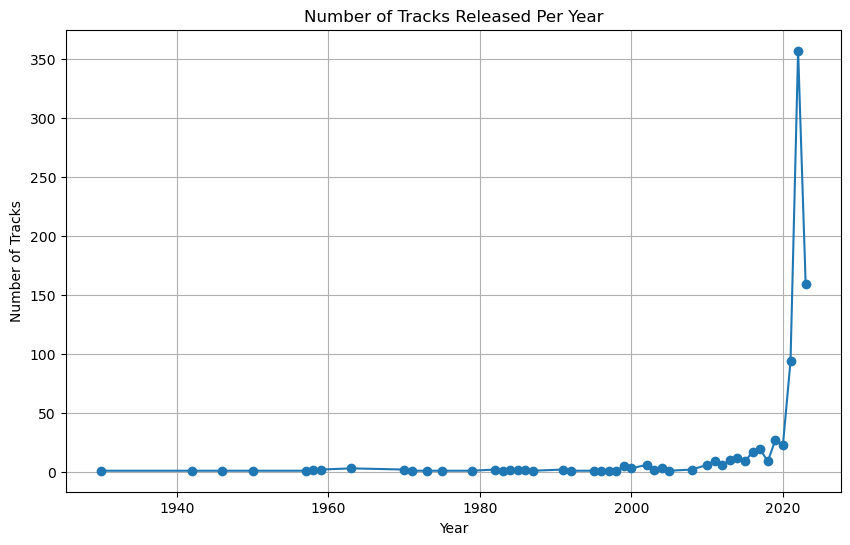

In [27]:
# Group by 'released_year' and count the number of tracks per year
tracks_per_year = df.groupby('released_year').size()

# Plot the number of tracks released per year
plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='line', marker='o')
plt.title("Number of Tracks Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.grid()
plt.show()


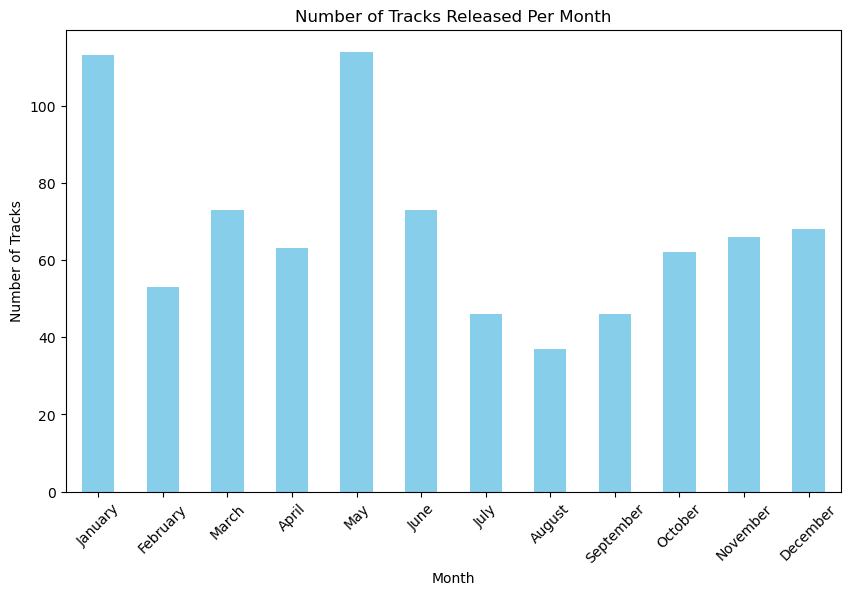

The month with the most releases is: May


In [28]:
import calendar

# Map numbers 1-12 to month names
df['released_month'] = df['released_month'].apply(lambda x: calendar.month_name[x])

# Group by 'released_month' and count the number of tracks per month
tracks_per_month = df['released_month'].value_counts().reindex(calendar.month_name[1:])

# Plot the number of tracks released per month
plt.figure(figsize=(10, 6))
tracks_per_month.plot(kind='bar', color='skyblue')
plt.title("Number of Tracks Released Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()

# Identify the month with the most releases
most_releases_month = tracks_per_month.idxmax()
print(f"The month with the most releases is: {most_releases_month}")


### 5.  Genre and Music Characteristics
#### - Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?#### - Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%??

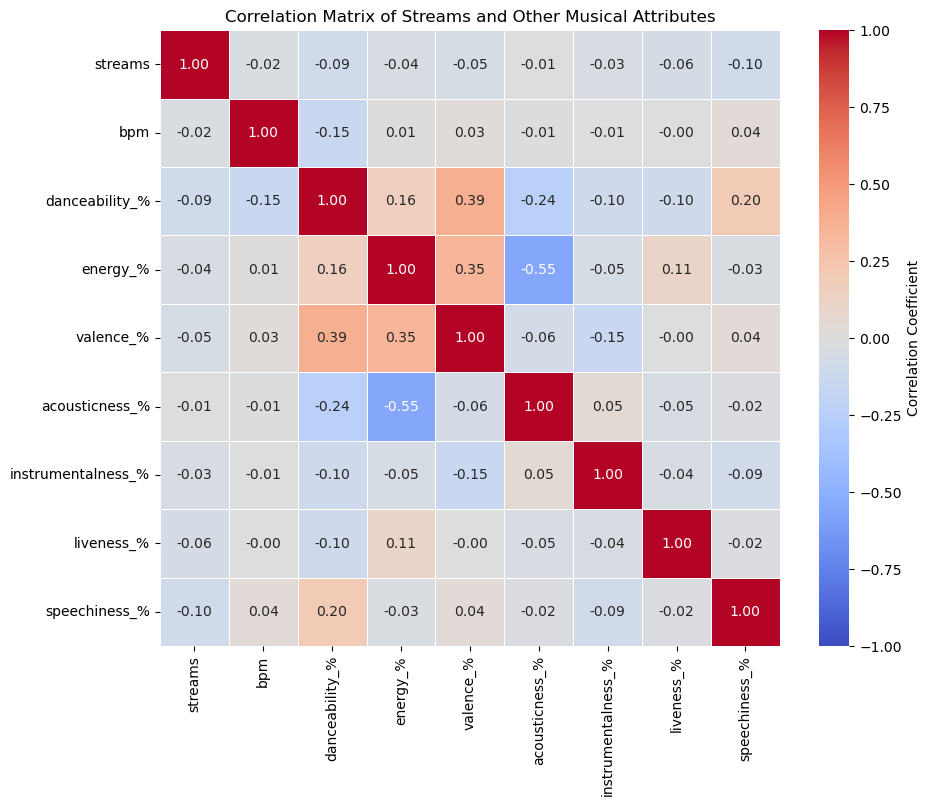

In [30]:
# relevant columns for correlation analysis
attributes = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calculates correlation matrix
correlation_matrix = df[attributes].corr()
# Creates a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})

# title
plt.title("Correlation Matrix of Streams and Other Musical Attributes")

# Shows the plot
plt.show()


In [31]:
# Calculate correlation between danceability_% and energy_%
danceability_energy_corr = df['danceability_%'].corr(df['energy_%'])
print(f"Correlation between danceability_% and energy_%: {danceability_energy_corr}")

# Calculate correlation between valence_% and acousticness_%
valence_acousticness_corr = df['valence_%'].corr(df['acousticness_%'])
print(f"Correlation between valence_% and acousticness_%: {valence_acousticness_corr}")


Correlation between danceability_% and energy_%: 0.15731151085516953
Correlation between valence_% and acousticness_%: -0.06413547021312398


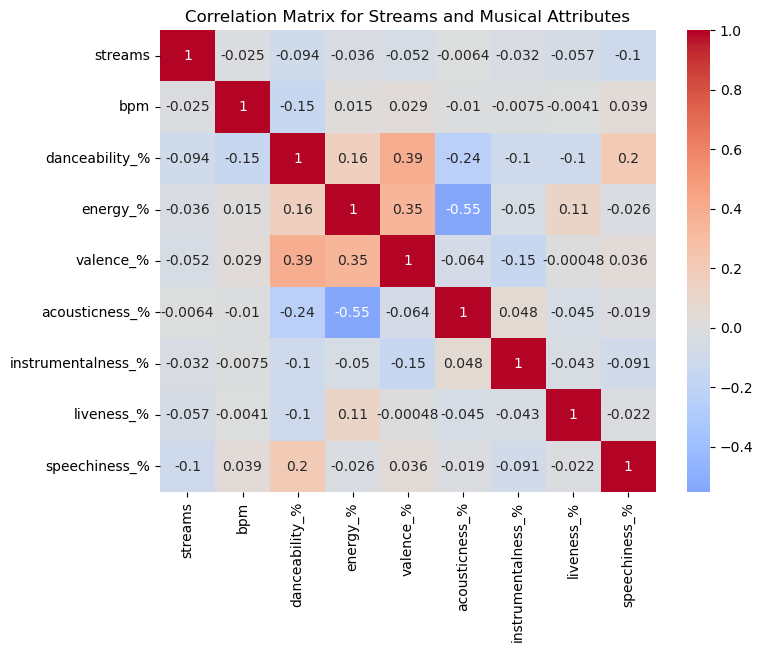

In [32]:
# Plot heatmap for selected attributes
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Streams and Musical Attributes")
plt.show()


### 6.  Platform Popularity
#### - How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

Total number of tracks in each platform's playlists:
Spotify: 3956865
Deezer: 303569
Apple: 49134


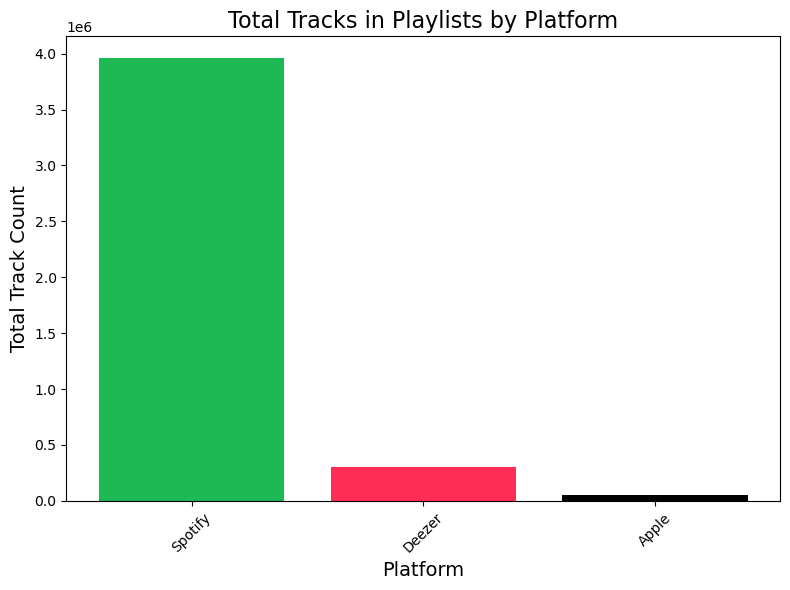

In [34]:
# Sum the total track count across each playlist platform
playlist_counts = {
    'Spotify': df['in_spotify_playlists'].sum(),
    'Deezer': df['in_deezer_playlists'].sum(),
    'Apple': df['in_apple_playlists'].sum()
}
# Display the total track counts for each platform
print("Total number of tracks in each platform's playlists:")
for platform, count in playlist_counts.items():
    print(f"{platform}: {count}")
# Creates a bar chart for the total track count on each platform
plt.figure(figsize=(8, 6))
plt.bar(playlist_counts.keys(), playlist_counts.values(), color=['#1DB954', '#FF2D55', '#000000'])  # Color for each platform
plt.title("Total Tracks in Playlists by Platform", fontsize=16)
plt.xlabel("Platform", fontsize=14)
plt.ylabel("Total Track Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Shows the plot
plt.show()

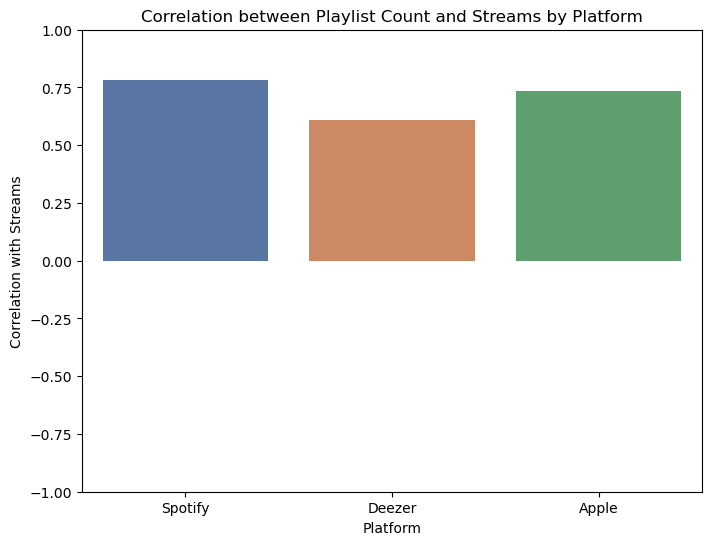


Correlation of playlist counts with streams (higher values suggest more popular track preference):
Spotify: 0.780751376112599
Deezer: 0.6110267208680025
Apple: 0.7361008185177631


In [35]:
# Calculate the correlation between streams and each playlist platform
spotify_corr = df['streams'].corr(df['in_spotify_playlists'])
deezer_corr = df['streams'].corr(df['in_deezer_playlists'])
apple_corr = df['streams'].corr(df['in_apple_playlists'])


correlations = {
    'Spotify': spotify_corr,
    'Deezer': deezer_corr,
    'Apple': apple_corr
}

# Convert the correlations dictionary to a DataFrame for plotting
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Platform', 'Correlation'])

# Plot the correlations as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=correlations_df, x='Platform', y='Correlation', hue='Platform', dodge=False, palette='deep', legend=False)
plt.title('Correlation between Playlist Count and Streams by Platform')
plt.ylim(-1, 1)  # Set y-axis limits to the correlation range
plt.xlabel('Platform')
plt.ylabel('Correlation with Streams')
plt.show()

# Display correlation results
print("\nCorrelation of playlist counts with streams (higher values suggest more popular track preference):")
print(f"Spotify: {spotify_corr}")
print(f"Deezer: {deezer_corr}")
print(f"Apple: {apple_corr}")

### 7. Advanced Analysis

#### - Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
#### -  Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

   key   mode          mean       median           std           q25  \
0    A  Major  3.885132e+08  241899327.5  3.485377e+08  1.525903e+08   
1    A  Minor  3.318357e+08  198701453.5  4.741398e+08  7.949771e+07   
2   A#  Major  5.120997e+08  448843705.0  4.957920e+08  1.785124e+08   
3   A#  Minor  4.890408e+08  206929807.0  5.881746e+08  1.257249e+08   
4    B  Major  3.717557e+08  160845341.0  4.492279e+08  1.119477e+08   
5    B  Minor  5.472914e+08  351748602.0  5.923624e+08  1.363782e+08   
6   C#  Major  5.479598e+08  278424827.0  6.278098e+08  1.338508e+08   
7   C#  Minor  5.600665e+08  312009041.0  6.798998e+08  1.096009e+08   
8    D  Major  5.482916e+08  284819874.0  6.172432e+08  1.621740e+08   
9    D  Minor  3.425588e+08  246376690.0  2.849738e+08  1.725932e+08   
10  D#  Major  6.320629e+08  370068639.0  6.043787e+08  2.416736e+08   
11  D#  Minor  4.269410e+08  198275403.0  4.652737e+08  1.276160e+08   
12   E  Major  6.962173e+08  411747614.0  7.111690e+08  1.697522

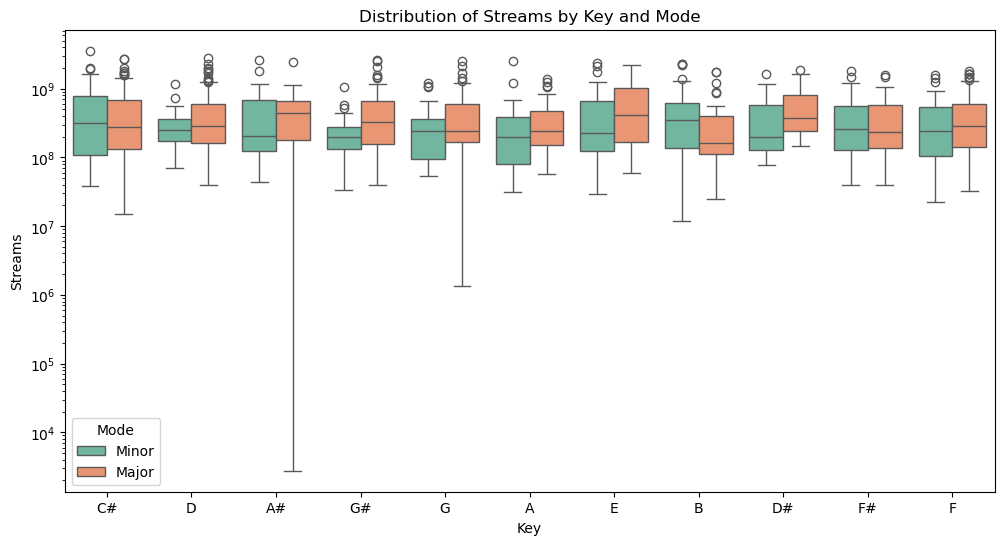

In [38]:
# Group by 'key' and 'mode', then calculate mean, median, std, and percentiles
grouped_stats = df.groupby(['key', 'mode'])['streams'].agg(
    mean='mean',
    median='median',
    std='std',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).reset_index()

print(grouped_stats)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='key', y='streams', hue='mode', palette='Set2')
plt.title('Distribution of Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.yscale('log')  # Log scale for better visibility
plt.legend(title='Mode')
plt.show()

Top 10 artists based on playlist appearances:
                               artist(s)_name  total_playlist_appearances
0                                  Ed Sheeran                      122190
1                                Taylor Swift                      118931
2                                      Eminem                      102927
3                                    Coldplay                       88824
4                         Dr. Dre, Snoop Dogg                       78053
5                                      Avicii                       76214
6                                       Adele                       74994
7                                     Nirvana                       73379
8  Pharrell Williams, Nile Rodgers, Daft Punk                       61316
9                              Kendrick Lamar                       61279


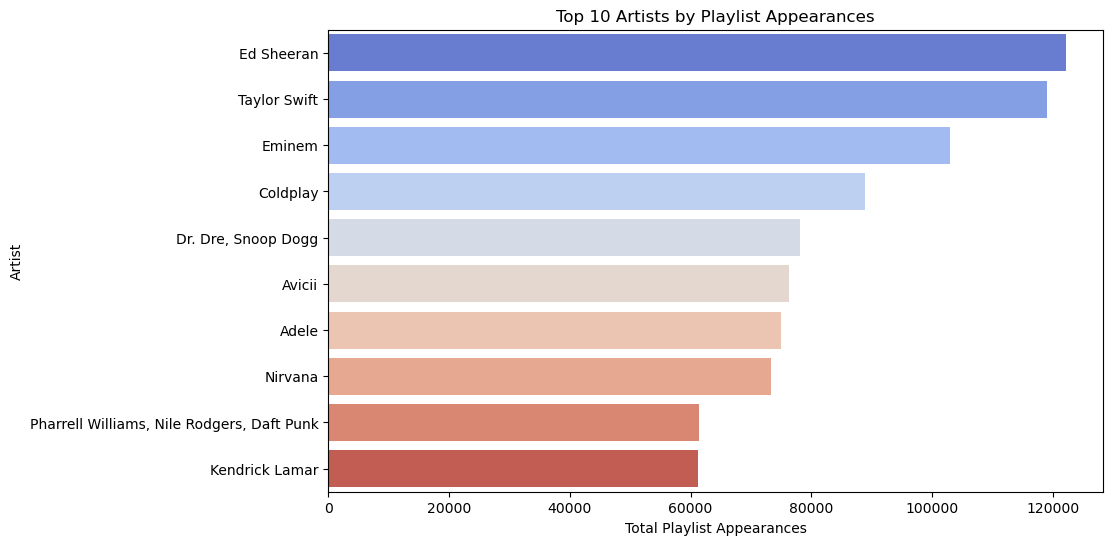

In [39]:
# Assuming columns `artist` and playlist counts ('in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists') exist
# Calculate the total number of playlist appearances for each artist
df['total_playlist_appearances'] = df[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum(axis=1)
artist_playlist_counts = df.groupby('artist(s)_name')['total_playlist_appearances'].sum().sort_values(ascending=False).reset_index()

# Display top 10 artists with the most playlist appearances
top_artists = artist_playlist_counts.head(10)
print("Top 10 artists based on playlist appearances:")
print(top_artists)

# Plot the top 10 artists by playlist appearances
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists, x='total_playlist_appearances', y='artist(s)_name', palette='coolwarm', hue='artist(s)_name', legend=False)
plt.title('Top 10 Artists by Playlist Appearances')
plt.xlabel('Total Playlist Appearances')
plt.ylabel('Artist')
plt.show()


Top 10 artists based on chart appearances:
      artist(s)_name  total_chart_appearances
0       Taylor Swift                   3816.0
1          Bad Bunny                   1689.0
2                SZA                   1552.0
3     Olivia Rodrigo                   1495.0
4         The Weeknd                   1349.0
5           NewJeans                   1341.0
6  Dave, Central Cee                   1267.0
7         Ed Sheeran                   1260.0
8              Gunna                   1257.0
9   Latto, Jung Kook                   1246.0


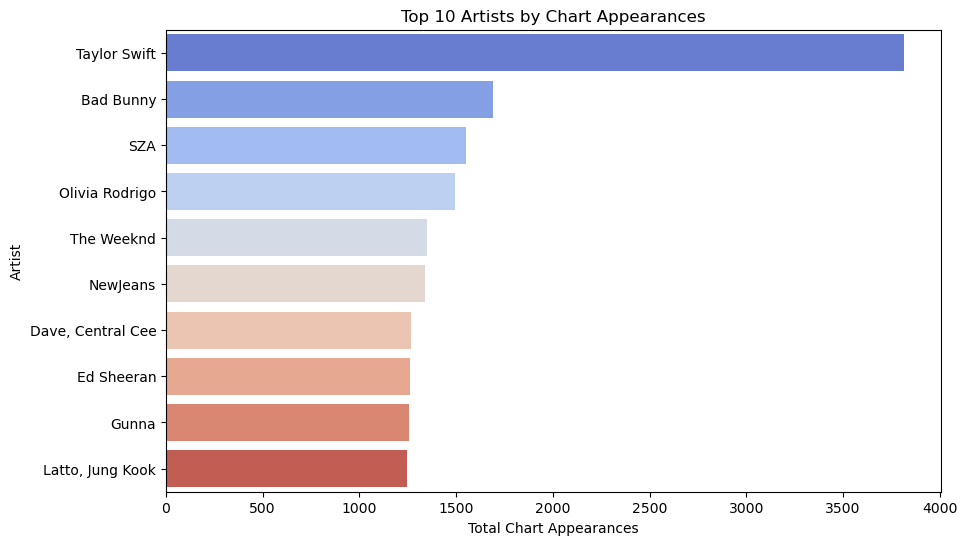

In [40]:
# Assuming columns `artist` and charts counts ('in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts') exist
# Calculate the total number of playlist appearances for each artist
df['total_chart_appearances'] = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sum(axis=1)
artist_playlist_counts = df.groupby('artist(s)_name')['total_chart_appearances'].sum().sort_values(ascending=False).reset_index()

# Display top 10 artists with the most playlist appearances
top_artists = artist_playlist_counts.head(10)
print("Top 10 artists based on chart appearances:")
print(top_artists)

# Plot the top 10 artists by playlist appearances
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists, x='total_chart_appearances', y='artist(s)_name', palette='coolwarm', hue='artist(s)_name', legend=False)
plt.title('Top 10 Artists by Chart Appearances')
plt.xlabel('Total Chart Appearances')
plt.ylabel('Artist')
plt.show()


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   track_name                  814 non-null    object 
 1   artist(s)_name              814 non-null    object 
 2   artist_count                814 non-null    int64  
 3   released_year               814 non-null    int64  
 4   released_month              814 non-null    object 
 5   released_day                814 non-null    int64  
 6   in_spotify_playlists        814 non-null    int64  
 7   in_spotify_charts           814 non-null    int64  
 8   streams                     813 non-null    float64
 9   in_apple_playlists          814 non-null    int64  
 10  in_apple_charts             814 non-null    int64  
 11  in_deezer_playlists         814 non-null    int64  
 12  in_deezer_charts            814 non-null    int64  
 13  in_shazam_charts            810 non